In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Exploration of Data Analysis:

In [2]:
# Load dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# info of dataset
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# summary statistics
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# First few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Data Cleansing:

In [6]:
# Check missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# In Age column fill missing value with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Convert 'Age' column to integer type
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [8]:
# Drop rows with missing Embarked values
titanic_data.dropna(subset=['Embarked'], inplace=True)

In [9]:
# Drop irrelevant columns
titanic_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [10]:
# Check missing values again
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Data Visualization:

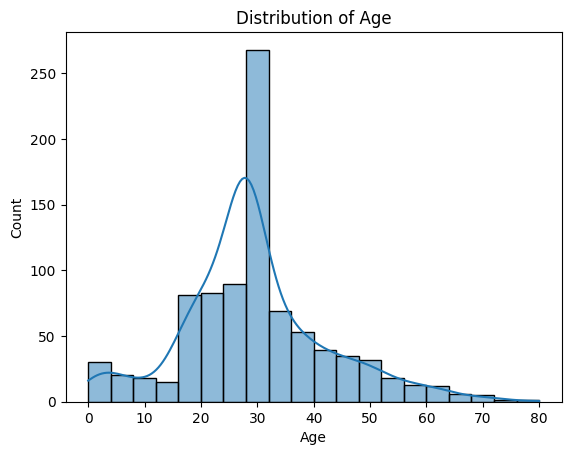

In [11]:
# distribution of age
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

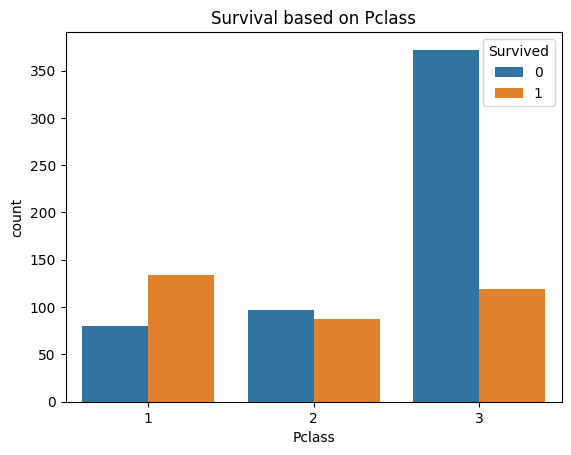

In [12]:
# survival based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival based on Pclass')
plt.show()

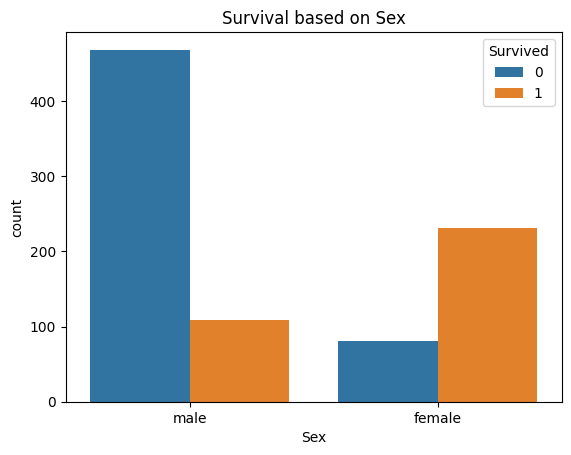

In [13]:
# survival based on Sex
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival based on Sex')
plt.show()

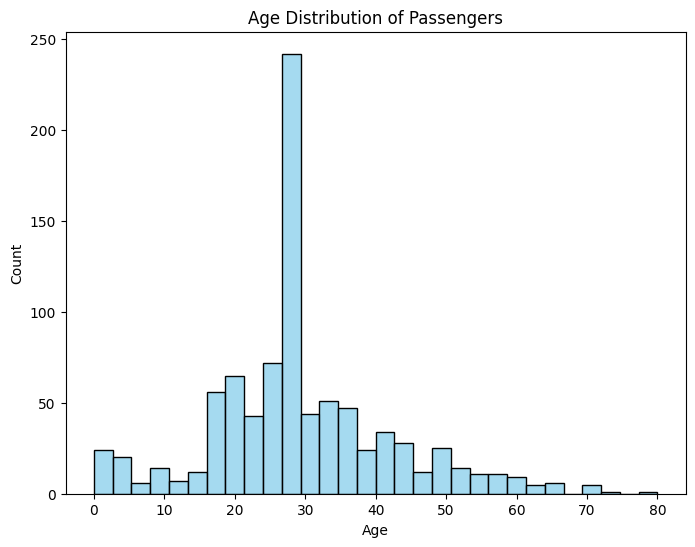

In [14]:
#This histogram gives you an overview of the age distribution of passengers on the Titanic.

plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=False, bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.show()

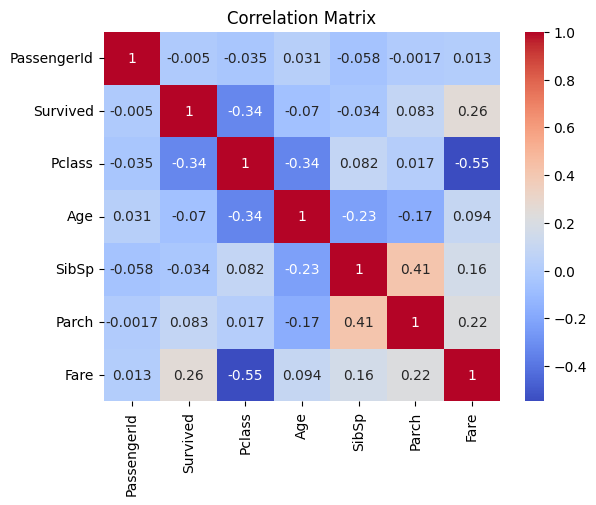

In [15]:
# Visualize correlation matrix
numeric_columns = titanic_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Modeling:

In [16]:
# Select features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Convert categorical variables to numerical 
X = pd.get_dummies(X)

# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7752808988764045
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



### Model Evaluation (Clustering - KMeans):

In [18]:
# Select features for clustering
X_cluster = titanic_data[['Pclass', 'Age', 'Fare']]

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)


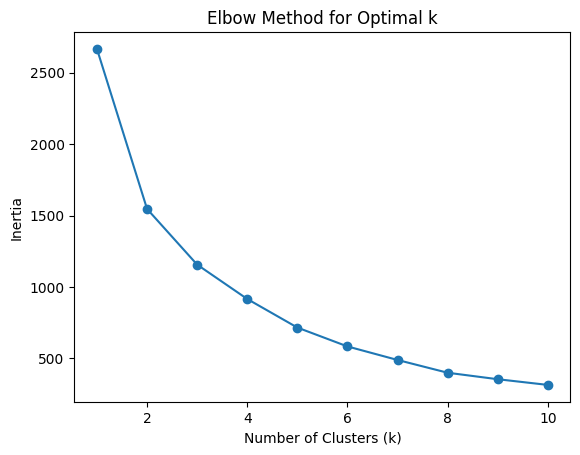

In [19]:
# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [20]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
titanic_data['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_cluster_scaled, titanic_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

#hjfkdjfkjdkjfiereu


#Yongyi Test push
#pp

Silhouette Score: 0.4856053526128851
